In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#set style
sns.set(style='whitegrid')

Step_By_Step plan
Step:1 Load and inspect the dataset
Step:2 clean and preprocess the dataset
Step:3 Analyize funding trends over Lime
Step:4 Identify top funded sectors,citics,startups
Step:5 Analyize investor behavior
Step:6Analyize investment types and stages
Step:7 Correlation analysis
Step:8 Identity

In [ ]:
def readexcel(filepath,filename):
  import os
  os.chdir(filepath)
  file = pd.read_excel(filename)

  return file

filepath = "/content/drive/MyDrive/day1 python"
filename = "startup_funding123 (2).xlsx"

df = readexcel(filepath,filename)
print(df.head(3))

   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private Equity   
2  Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...    Seed Funding   

   Amount_In_INR Remarks  
0      1300000.0     NaN  
1            NaN     NaN  
2            NaN     NaN  


In [ ]:
print("First 5 rows:")
print(df.head())
print("/nDataset Info:")
print(df.info())
print("/nMissing Values:")
print(df.isnull().sum())

First 5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

In [ ]:
df.columns


Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks'],
      dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month

In [ ]:
df['Amount_In _INR'] =df['Amount_In_INR'].fillna(df['Amount_In_INR'])

In [ ]:
df.to_csv('cleaned_startup_funding.csv',index=False)

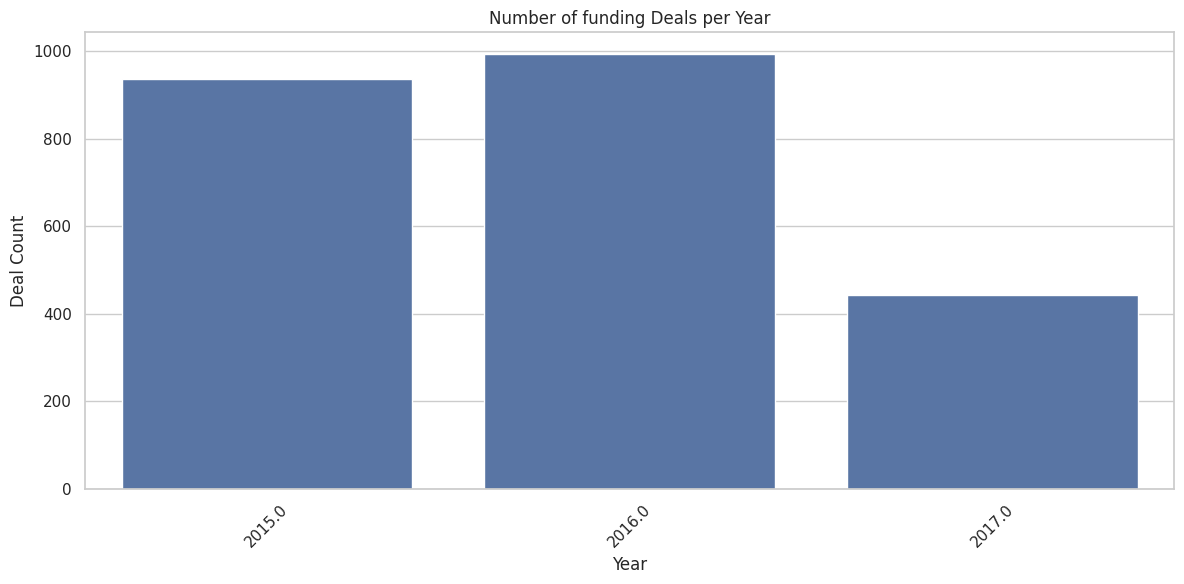

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year',data=df)
plt.title("Number of funding Deals per Year")
plt.xlabel("Year")
plt.ylabel("Deal Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

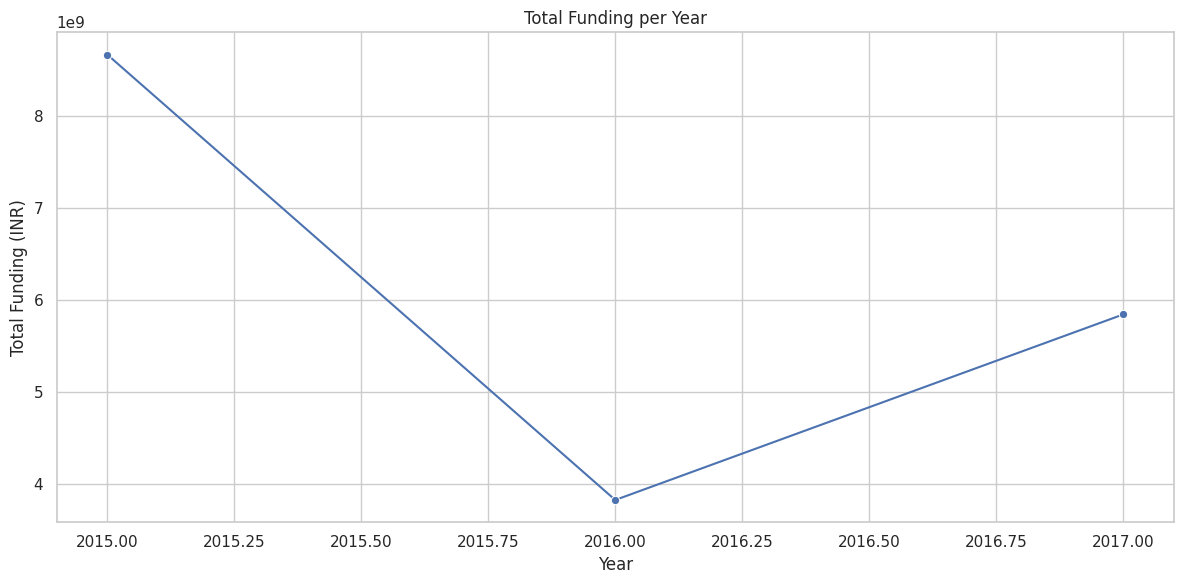

In [ ]:
#Total funding per year
yearly_funding=df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Amount_In_INR',data=yearly_funding,marker='o')
plt.xlabel("Year")
plt.ylabel("Total Funding (INR)")
plt.title("Total Funding per Year")
plt.grid(True)
plt.tight_layout()
plt.show()

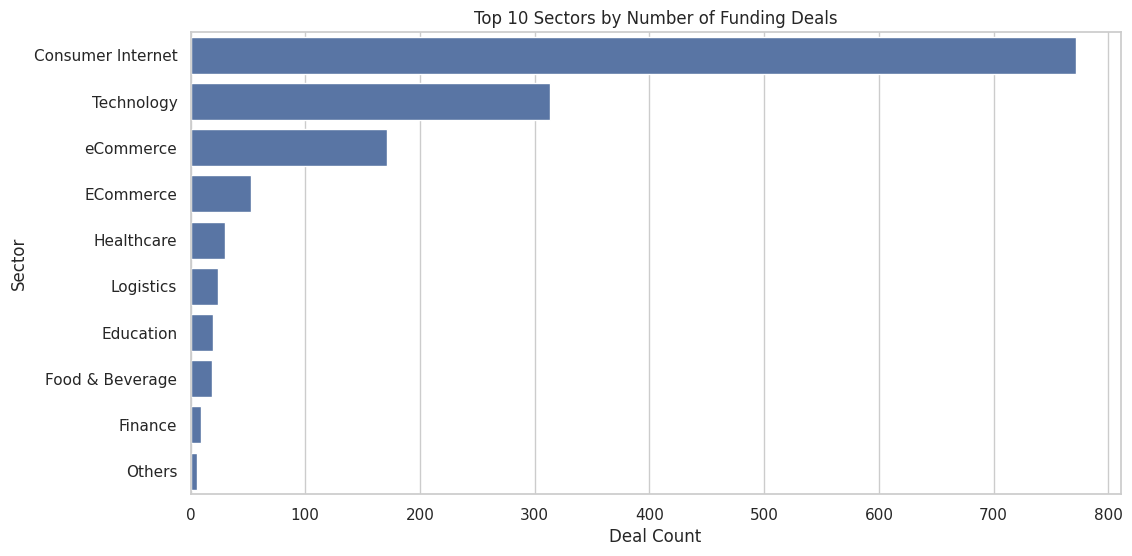

In [ ]:
#top Sectors by deal count
top_sectors = df['Industry_Vertical'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title("Top 10 Sectors by Number of Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("Sector")
plt.show()

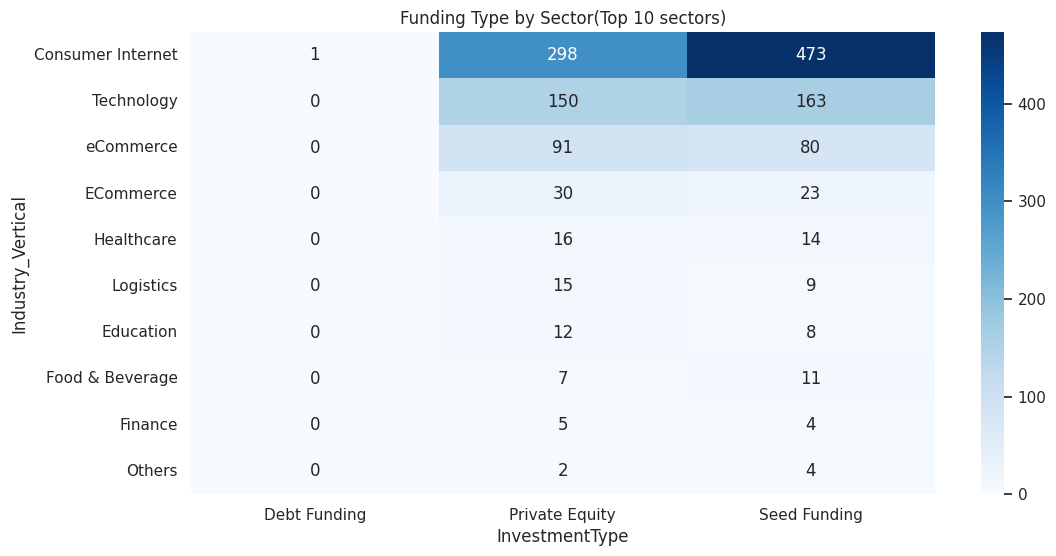

In [ ]:
sector_stage=pd.crosstab(df['Industry_Vertical'],df['InvestmentType'])
sector_stage=sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

plt.figure(figsize=(12,6))
sns.heatmap(sector_stage,annot=True,fmt='d',cmap='Blues')
plt.title("Funding Type by Sector(Top 10 sectors)")
plt.show()

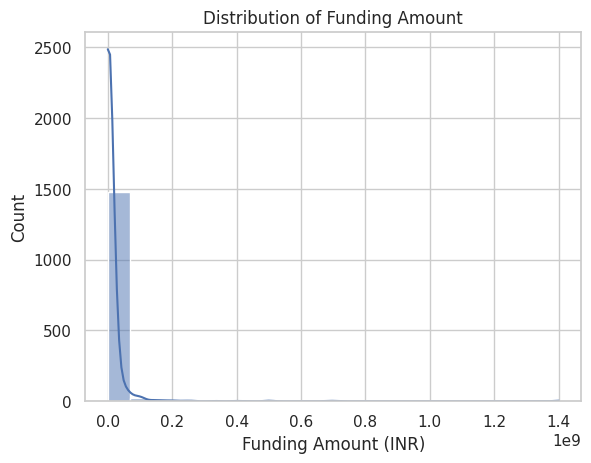

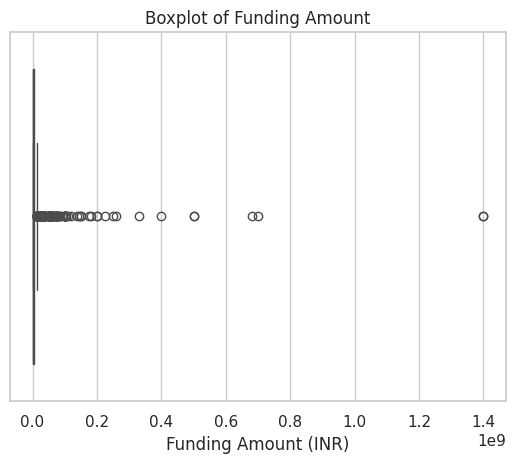

In [ ]:
import seaborn as sns
sns.histplot(df['Amount_In_INR'],bins=20,kde=True)
plt.title("Distribution of Funding Amount")
plt.xlabel("Funding Amount (INR)")
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title("Boxplot of Funding Amount")
plt.xlabel("Funding Amount (INR)")
plt.show()

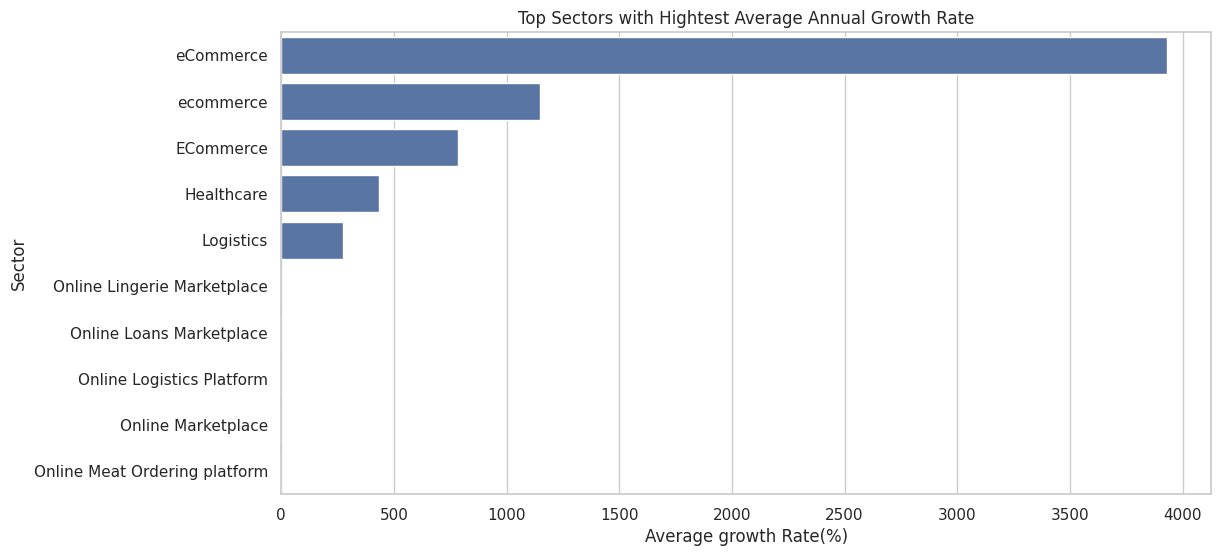

In [ ]:
sector_yearly =df.groupby(['Year','Industry_Vertical'])['Amount_In_INR'].sum().unstack()#.fillna(0)
sector_growth = sector_yearly.pct_change().mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_growth.values*100, y=sector_growth.index)
plt.title("Top Sectors with Hightest Average Annual Growth Rate")
plt.xlabel("Average growth Rate(%)")
plt.ylabel("Sector")
plt.show()

In [ ]:
#sqlit multiple investors and count
investors_df=df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.split(',')
investors_df=investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name']=investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
def clssify_investor(name):
    name = name.lower()
    if any(word in name for word in['capital','ventires','pertners','fund','vc','labs']):
      return 'VC'
    elif any(word in name for word in['angel','network']):
      return 'Angel'
    elif any(word in name for word in['crop','limited','pvt','ltd','lnc']):
      return 'Corporate'
    else:
      return 'Other'

Text(0, 0.5, 'Investor Type')

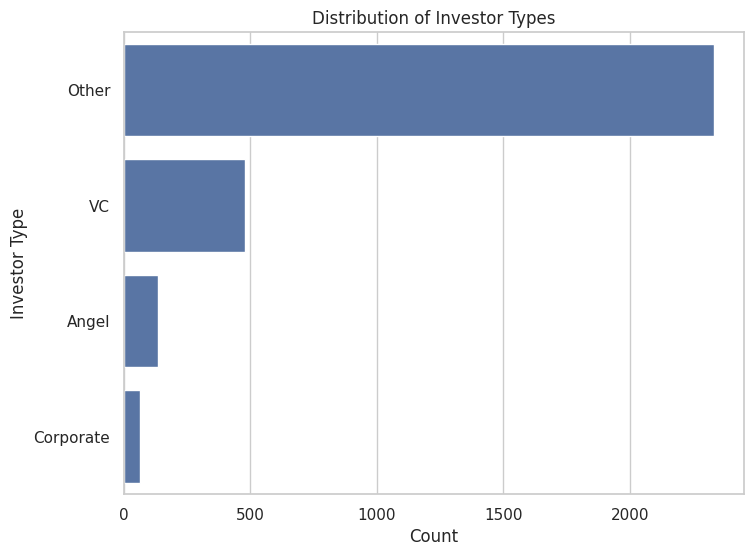

In [ ]:
investors_df['Investor_Type']=investors_df['Investors_Name'].apply(clssify_investor)
investors_type_count=investors_df['Investor_Type'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=investors_type_count.values,y=investors_type_count.index)
plt.title("Distribution of Investor Types")
plt.xlabel("Count")
plt.ylabel("Investor Type")

In [ ]:
#Count how many an investor in the startup
investor_startup_counts = investors_df.groupby('Investors_Name')['StartupName'].size().reset_index(name='Dev')
repeat_investors = investor_startup_counts[investor_startup_counts['Dev']>1]

repeat_investors_summary = repeat_investors.groupby('Investors_Name')['Dev'].sum().sort_values(ascending=False).head(10)

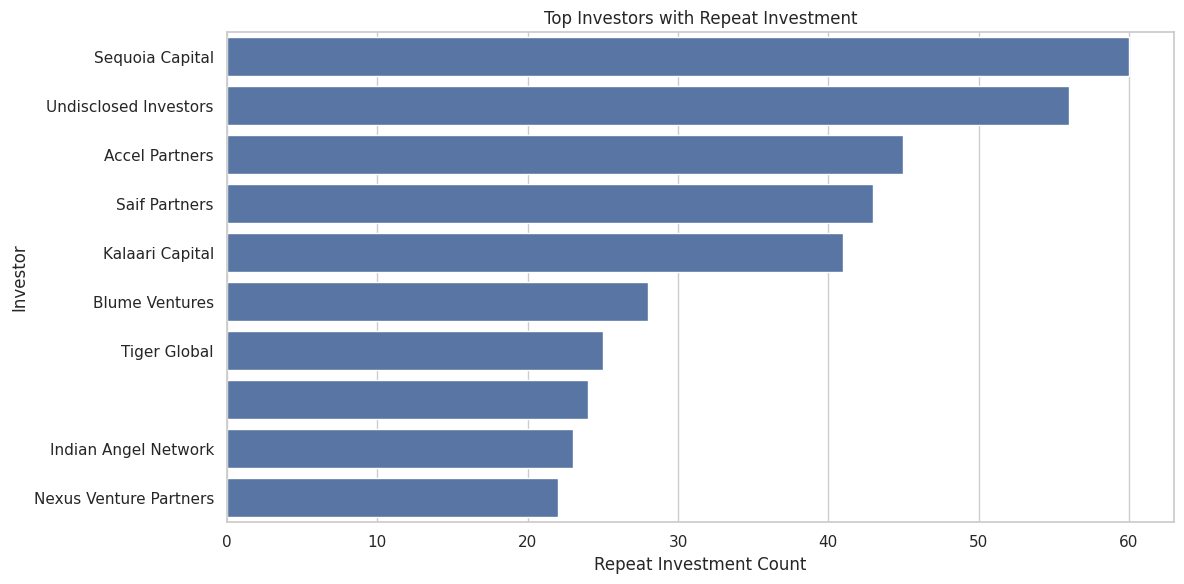

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=repeat_investors_summary.values, y=repeat_investors_summary.index)
plt.title("Top Investors with Repeat Investment")
plt.xlabel("Repeat Investment Count")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()

In [ ]:
#Define stage categories
early_stage = ['Seed','Pre-Seed','Angel']
late_stage = ['Series A','Series B','Series C','Series D','Series E','Private Equity','Venture Debt','Debt Funding']


In [ ]:
df['Funding_Stage'] = df['InvestmentType'].str.strip().str.title()
df['Funding_Stage'] = df['Funding_Stage'].apply(lambda x: 'Early Stage' if x in early_stage else ('Late Stage' if x in late_stage else 'Other'))


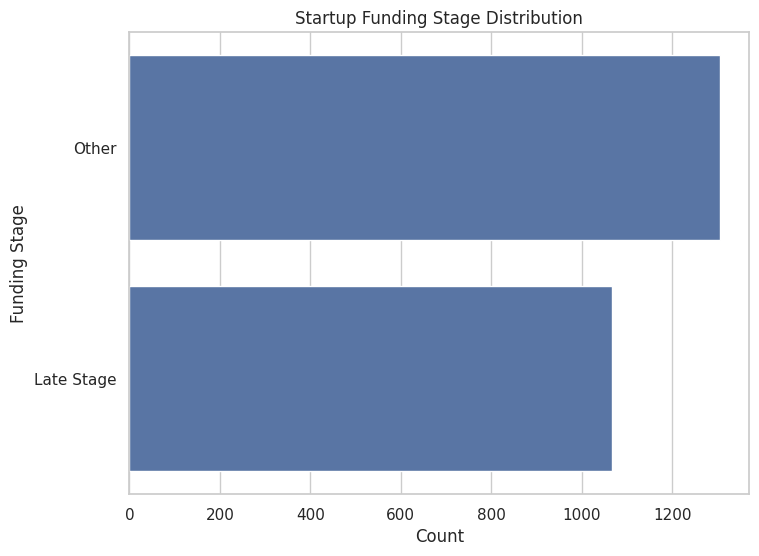

In [ ]:
#plot
plt.figure(figsize=(8,6))
sns.countplot(y='Funding_Stage', data=df, order=df['Funding_Stage'].value_counts().index)
plt.title("Startup Funding Stage Distribution")
plt.xlabel("Count")
plt.ylabel("Funding Stage")
plt.show()

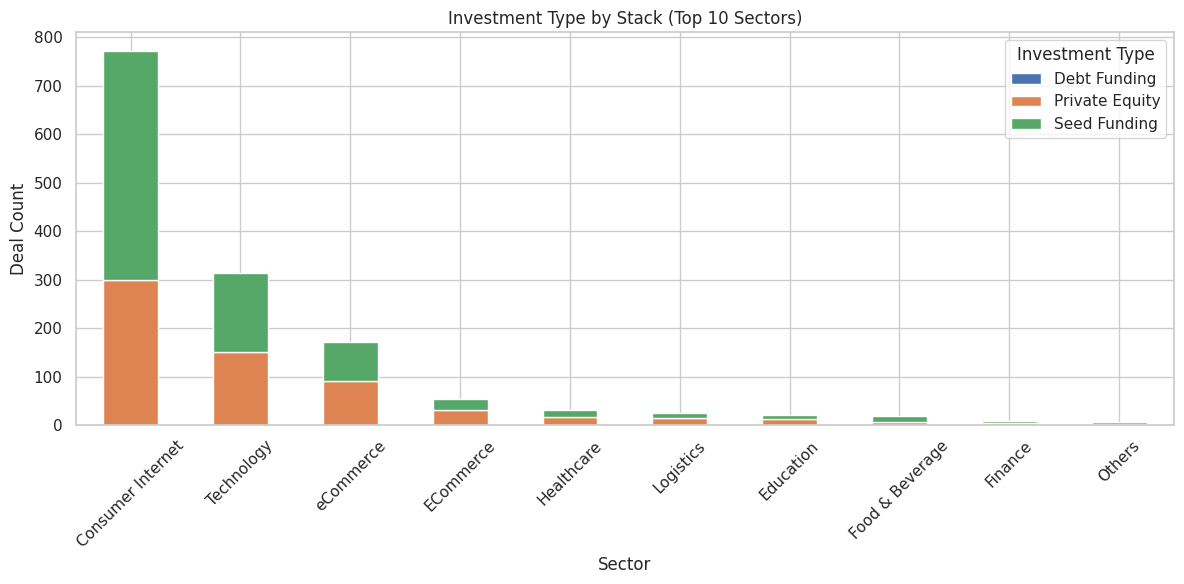

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

sector_stage.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Investment Type by Stack (Top 10 Sectors)")
plt.xlabel("Sector")
plt.ylabel("Deal Count")
plt.xticks(rotation=45)
plt.legend(title='Investment Type')
plt.tight_layout()
plt.show()